This Notebook Only Conatins Functions for Testing a Model.

In [1]:
import os
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import v2

seed = 42
np.random.seed(seed)

mainfolder = r"./compressed_dataset"


In [2]:
# We use this data to choose a random country from which to choose an image out
# of all og the countries. We will generate batches with this.

# Amount of images per country
data_per_country = {}

# Mappings country -> Int and viceversa
country_to_int = {}
int_to_country = {}

# Number of countries (is updated after for loop)
number_countries = 0

# Total amount of images
total_data = 0

i = 0
for country in os.listdir(mainfolder):

    country_to_int[country] = i
    int_to_country[i] = country
    i += 1

    amount = len(os.listdir(os.path.join(mainfolder, country)))
    data_per_country[country] = amount
    total_data += amount

number_countries = i

probabilities = [0]*number_countries


for key, value in data_per_country.items():
    probabilities[country_to_int[key]] = value/total_data


print(country_to_int)
print(int_to_country)
print(data_per_country)
print(probabilities)
print(total_data, number_countries)

{'Bhutan': 0, 'Kenya': 1, 'Botswana': 2, 'Poland': 3, 'Tunisia': 4, 'Eswatini': 5, 'Belarus': 6, 'Sweden': 7, 'Russia': 8, 'Norway': 9, 'Tanzania': 10, 'Luxembourg': 11, 'Sri Lanka': 12, 'Brazil': 13, 'Faroe Islands': 14, 'Kyrgyzstan': 15, 'Ghana': 16, 'US Virgin Islands': 17, 'San Marino': 18, 'Ukraine': 19, 'Svalbard and Jan Mayen': 20, 'France': 21, 'Jersey': 22, 'American Samoa': 23, 'Ecuador': 24, 'Nepal': 25, 'South Sudan': 26, 'Bermuda': 27, 'Guatemala': 28, 'Belgium': 29, 'Gibraltar': 30, 'Turkey': 31, 'Netherlands': 32, 'Guam': 33, 'Hong Kong': 34, 'Malaysia': 35, 'Indonesia': 36, 'Estonia': 37, 'Iraq': 38, 'Spain': 39, 'Montenegro': 40, 'Costa Rica': 41, 'Macao': 42, 'Serbia': 43, 'South Korea': 44, 'Croatia': 45, 'Australia': 46, 'Northern Mariana Islands': 47, 'Myanmar': 48, 'Lesotho': 49, 'Latvia': 50, 'United Kingdom': 51, 'Qatar': 52, 'Germany': 53, 'Laos': 54, 'Nigeria': 55, 'Albania': 56, 'Mongolia': 57, 'Uruguay': 58, 'Venezuela': 59, 'Slovakia': 60, 'Argentina': 61, 

In [3]:
# Creating test split: we take the name of 0.1 images from each country and add them to a dictionary,
# this dictionary will represent out test split.

percentage = 0.1

# This dictionary represents test split
test_images = {}
test_size = 0

# Loop through filesystem adding 'percentage*(the amount of images that a certain country has)' distinct images from that country
for country, amount_data in data_per_country.items():
    test_images[country] = []
    for i in range(int(amount_data*percentage)):
        image_name = os.listdir(os.path.join(mainfolder, country))[i]
        test_images[country].append(image_name)
    test_size += int(amount_data*percentage)


print(test_images)
print(test_size)

{'Bhutan': ['canvas_1629262074.jpg', 'canvas_1629527767.jpg'], 'Kenya': ['canvas_1629925277.jpg', 'canvas_1629837897.jpg', 'canvas_1630278825.jpg', 'canvas_1629433275.jpg', 'canvas_1630286494.jpg', 'canvas_1629420802.jpg', 'canvas_1629692576.jpg', 'canvas_1629738400.jpg', 'canvas_1629732477.jpg', 'canvas_1629956926.jpg', 'canvas_1629398720.jpg', 'canvas_1629279870.jpg', 'canvas_1629284902.jpg'], 'Botswana': ['canvas_1629747028.jpg', 'canvas_1629733030.jpg', 'canvas_1629513416.jpg', 'canvas_1629913698.jpg', 'canvas_1629685585.jpg', 'canvas_1629851468.jpg', 'canvas_1630336815.jpg', 'canvas_1630269097.jpg', 'canvas_1629588192.jpg', 'canvas_1630141984.jpg', 'canvas_1629766797.jpg', 'canvas_1629394047.jpg', 'canvas_1630272517.jpg', 'canvas_1629714843.jpg'], 'Poland': ['canvas_1630094174.jpg', 'canvas_1629536669.jpg', 'canvas_1629770684.jpg', 'canvas_1629593955.jpg', 'canvas_1630215808.jpg', 'canvas_1630078484.jpg', 'canvas_1629784261.jpg', 'canvas_1629475220.jpg', 'canvas_1629534268.jpg', '

In [4]:
##
##  ATTENTION: These functions have been modified to avoid choosingfrom test split
##

def get_N_Images(n, path=mainfolder, probabilities=None):
    """
        Gets 'n' images of the dataset with probabilities 'probabilities' for each country.
        If this is None it get's images with equal probability
    """

    processed_images = torch.empty(n,3,224,224) # ResNet's input size
    labels = torch.empty(n)

    # Define transformation to apply to images
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    # Iterate over n random images
    for i in range(n):

        # This randomly chose indice will dictate what country the image is chose from
        country = np.random.choice(os.listdir(path), p=probabilities)

        # Choose a random image from the selected country folder
        image_name = np.random.choice(os.listdir(os.path.join(path, country)))
        while image_name in test_images[country]:
            image_name = np.random.choice(os.listdir(os.path.join(path, country)))

        # Load and process the image
        image_path = os.path.join(path, country, image_name)
        image = Image.open(image_path)
        processed_image = transform(image)

        # Append the processed image to the list
        processed_images[i] =  processed_image.unsqueeze(0)

        # Append the label
        labels[i] = country_to_int[country]

    return processed_images, labels.long()

torch.Size([5, 3, 224, 224])

United Kingdom


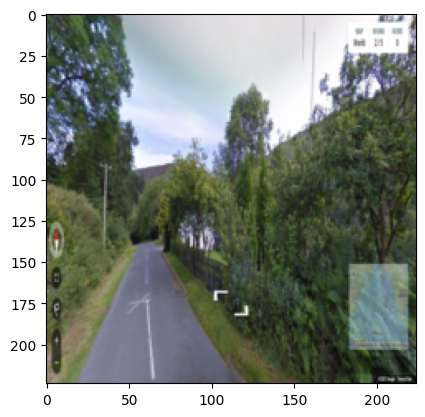

In [30]:
data, labels = get_N_Images(5)

print(data.size())
print()

print(int_to_country[labels[0].item()])
plt.imshow(data[0].permute(1, 2, 0))

In [27]:
def get_Test_Image_Names(path=mainfolder):
    """
        I use this to iterate over dictionary. It's messy but I this was an easy
        and kind of efficient way of doing it.
    """
    for country in test_images:
        for image_name in test_images[country]:
            yield os.path.join(path, country, image_name)

def get_Test_Images(n, path=mainfolder):
    """
        Returns test images in groups of 'n' (or 'test_size % n') using yield. The reason for this it's that the test is close to 5000 images!
        I am not puttng 5000 images in memory!
    """
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    image_names = get_Test_Image_Names(path=path)

    remaining = 0
    while remaining < test_size:

        group_size = min(n, test_size - remaining)
        processed_images = torch.empty(group_size,3,224,224) # ResNet's inpoyut size
        labels = torch.empty(group_size)

        count = 0

        while count < group_size:

            image_name = next(image_names)

            image = Image.open(image_name)
            processed_images[count] =  transform(image).unsqueeze(0)
            labels[count] = country_to_int[country]
            remaining+=1
            count+=1

        yield processed_images, labels
            
            

def test(model, n, path=mainfolder):
    """
        Just a simple test function: we test on images in test_images
    """
    softmax = nn.Softmax()
    with torch.no_grad():
        accuracy = 0
        for inputs, labels in get_Test_Images(n, path=path):
            predictions = torch.argmax(softmax(model.forward(inputs)), dim=-1)
            accuracy += torch.count_nonzero(labels == predictions).item()/labels.size()[0]
        return accuracy, predictions, labels

In [24]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)#.cuda()

Using cache found in /Users/guille/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/anaconda3/envs/jupyter_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/jupyter_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [28]:
accuracy, predictions, labels = test(model, n=400)

print(f"Accuracy is {accuracy*100:.4f}%")


/opt/anaconda3/envs/jupyter_env/lib/python3.9/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [99]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)#.cuda()
model.load_state_dict(torch.load("./MyGeoModel"))

Using cache found in /Users/guille/.cache/torch/hub/pytorch_vision_v0.10.0


<All keys matched successfully>